<a href="https://colab.research.google.com/github/datagirl98/Required-Assignment-5.1/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load the drive helper
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# New Section

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practical_1/coupons.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
print("\n=== Missing Values per Column ===")
print(df.isnull().sum())


=== Missing Values per Column ===
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [6]:
print(df['Bar'].value_counts())

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Keep missing data

4. What proportion of the total observations chose to accept the coupon?



In [8]:
# Calculate proportion
acceptance_rate = df['Y'].mean()

# Print result as a percentage
print(f"Proportion of people who accepted the coupon: {acceptance_rate:.2%}")

Proportion of people who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

<ipython-input-9-488230480>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acceptance_by_coupon, x='coupon', y='Accepted (%)', palette='viridis')


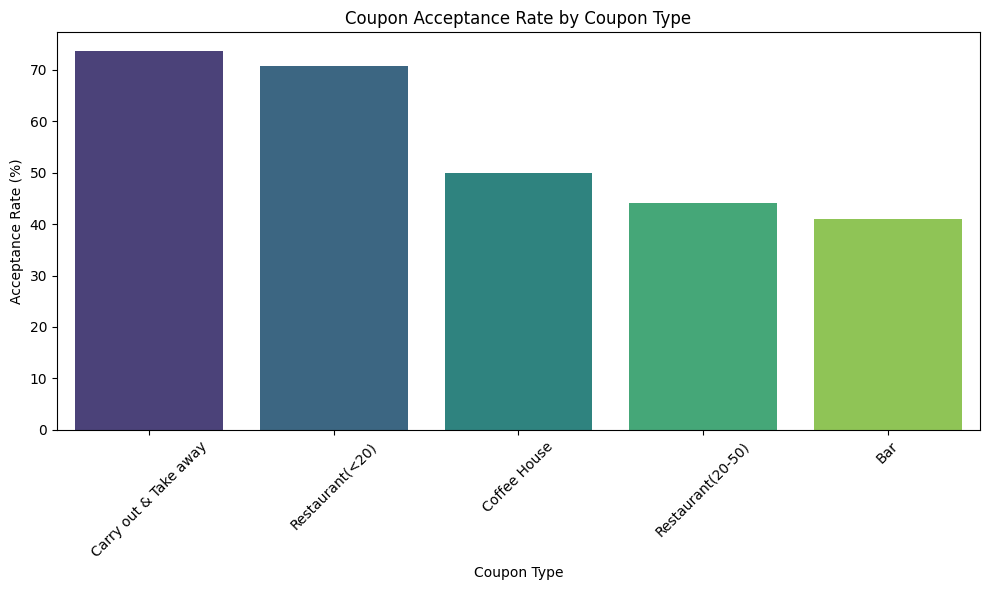

In [9]:
# Calculate acceptance rate by coupon type
acceptance_by_coupon = pd.crosstab(df['coupon'], df['Y'], normalize='index') * 100
acceptance_by_coupon.columns = ['Not Accepted (%)', 'Accepted (%)']
acceptance_by_coupon = acceptance_by_coupon.sort_values('Accepted (%)', ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=acceptance_by_coupon, x='coupon', y='Accepted (%)', palette='viridis')

plt.title('Coupon Acceptance Rate by Coupon Type')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

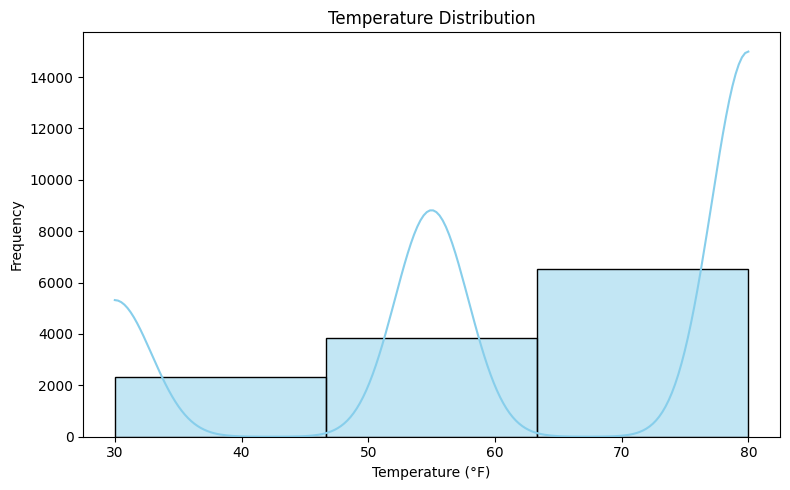

In [10]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='temperature', bins=3, kde=True, color='skyblue')

plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
# Filter rows where coupon is 'Bar'
bar_coupons_df = df[df['coupon'] == 'Bar']

# Optional: Preview the result
print(bar_coupons_df.head())
print(f"Total rows with 'Bar' coupon: {len(bar_coupons_df)}")

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [12]:
# Filter rows where coupon is 'Bar'
bar_coupons_df = df[df['coupon'] == 'Bar']
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1]  # Filter for accepted coupons

# Calculate the proportion
proportion_accepted = len(accepted_bar_coupons) / len(bar_coupons_df)
print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f}")


Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# Define frequency categories
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Create a group column
bar_coupons_df['bar_visit_group'] = bar_coupons_df['Bar'].apply(
    lambda x: '≤3x/month' if x in low_freq else ('>3x/month' if x in high_freq else 'Other')
)

# Filter to just the two groups
df_filtered = bar_coupons_df[bar_coupons_df['bar_visit_group'].isin(['≤3x/month', '>3x/month'])]

# Calculate acceptance rate per group
acceptance_rate = bar_coupons_df.groupby('bar_visit_group')['Y'].mean().reset_index()
acceptance_rate['Y'] = acceptance_rate['Y'] * 100  # Convert to %

# Rename columns for clarity
acceptance_rate.columns = ['Bar Visit Frequency', 'Acceptance Rate (%)']

# Display result
print(acceptance_rate)

  Bar Visit Frequency  Acceptance Rate (%)
0           >3x/month            76.884422
1               Other            38.095238
2           ≤3x/month            37.061770


<ipython-input-13-1202022133>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['bar_visit_group'] = bar_coupons_df['Bar'].apply(


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practical_1/coupons.csv')

# Define age filtering logic
def is_over_25(age_str):
    if age_str == 'below21':
        return False
    elif age_str in ['21', '21-25']:
        return False
    else:
        return True

# Define bar frequency logic
def bar_more_than_once_per_month(freq):
    return freq in ['1~3', '4~8', 'gt8']

# Apply filters
df['target_group'] = df.apply(
    lambda row: 'Over25 & Bar>1x' if is_over_25(row['age']) and bar_more_than_once_per_month(row['Bar']) else 'Other',
    axis=1
)

# Calculate acceptance rate
acceptance_comparison = df.groupby('target_group')['Y'].mean().reset_index()
acceptance_comparison['Y'] = acceptance_comparison['Y'] * 100  # Convert to %

# Rename columns for readability
acceptance_comparison.columns = ['Group', 'Acceptance Rate (%)']

# Show result
print(acceptance_comparison)


             Group  Acceptance Rate (%)
0            Other            55.354800
1  Over25 & Bar>1x            62.153403


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [15]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practical_1/coupons.csv')

# Define filters
def qualifies(row):
    bar_ok = row['Bar'] in ['1~3', '4~8', 'gt8']
    passenger_ok = row['passanger'].lower() != 'kid(s)'
    occupation_ok = row['occupation'].lower() != 'farming fishing & forestry'
    return bar_ok and passenger_ok and occupation_ok

# Apply group labeling
df['target_group'] = df.apply(
    lambda row: 'Bar>1x + NoKids + Non-Farm' if qualifies(row) else 'Other',
    axis=1
)

# Calculate acceptance rate
acceptance_comparison = df.groupby('target_group')['Y'].mean().reset_index()
acceptance_comparison['Y'] = acceptance_comparison['Y'] * 100  # Convert to %

# Rename for clarity
acceptance_comparison.columns = ['Group', 'Acceptance Rate (%)']

# Display result
print(acceptance_comparison)


                        Group  Acceptance Rate (%)
0  Bar>1x + NoKids + Non-Farm            62.310606
1                       Other            54.595016


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [16]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practical_1/coupons.csv')

# Define helper functions
def is_under_30(age):
    return age in ['below21', '21', '21-25', '26-30']

def bar_more_than_once(freq):
    return freq in ['1~3', '4~8', 'gt8']

def cheap_rest_more_than_4(freq):
    return freq in ['4~8', 'gt8']

def income_below_50k(income):
    return income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Define logic for group membership
def is_in_target_group(row):
    bar_freq = bar_more_than_once(row['Bar'])
    passenger_not_kid = row['passanger'].lower() != 'kid(s)'
    marital_not_widowed = row['maritalStatus'].lower() != 'widowed'
    age_under_30 = is_under_30(row['age'])
    cheap_rest = cheap_rest_more_than_4(row['Restaurant20To50'])
    low_income = income_below_50k(row['income'])

    cond1 = bar_freq and passenger_not_kid and marital_not_widowed
    cond2 = bar_freq and age_under_30
    cond3 = cheap_rest and low_income

    return cond1 or cond2 or cond3

# Apply the classification
df['group'] = df.apply(lambda row: 'Target Group' if is_in_target_group(row) else 'Other', axis=1)

# Calculate acceptance rate
result = df.groupby('group')['Y'].mean().reset_index()
result['Y'] = result['Y'] * 100  # convert to percent
result.columns = ['Group', 'Acceptance Rate (%)']

# Display result
print(result)

          Group  Acceptance Rate (%)
0         Other             54.20211
1  Target Group             62.86527


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


**1. They are socially active**
Drivers who go to bars more than once a month are significantly more likely to accept bar coupons. This suggests they see real value in these offers and are already frequenting such venues.

**2. They are younger**
Drivers under age 30 had higher acceptance rates. This group may be more spontaneous, cost-conscious, and open to trying promotions or experiences.

**3. They are not widowed and likely more socially engaged**
Widowed drivers had lower acceptance rates. Drivers who are not widowed may be more likely to go out socially and thus find bar coupons more appealing.

**4. They do not usually drive with kids**
Drivers with non-kid passengers (friends, partners) accepted bar coupons more. This aligns with the assumption that they are going out for leisure, not family-oriented trips.

**5. They may be value-seeking or lower-income**
Those who frequent cheap restaurants and earn under $50K also had higher acceptance rates. This supports the idea that price-sensitive drivers are more likely to use discounts like bar coupons.

### Independent Investigation - Coffee House Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [17]:
print(df['CoffeeHouse'].value_counts())

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


In [18]:
# Filter rows where coupon is 'CoffeeHouse'
CoffeeHouse_coupons_df = df[df['coupon'] == 'Coffee House']

# Optional: Preview the result
print(CoffeeHouse_coupons_df.head())
print(f"Total rows with 'Coffee House' coupon: {len(CoffeeHouse_coupons_df)}")

        destination  passanger weather  temperature  time        coupon  \
1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15             Home      Alone   Sunny           80   6PM  Coffee House   

   expiration  gender age      maritalStatus  ...  CarryAway  \
1          2h  Female  21  Unmarried partner  ...        NaN   
3          2h  Female  21  Unmarried partner  ...        NaN   
4          1d  Female  21  Unmarried partner  ...        NaN   
12         2h  Female  21  Unmarried partner  ...        NaN   
15         2h  Female  21  Unmarried partner  ...        NaN   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
1                   4~8              1~3                1                 0   
3     

In [19]:
# Filter rows where coupon is 'Coffee House'
CH_coupons_df = df[df['coupon'] == 'Coffee House']
accepted_CH_coupons = CH_coupons_df[CH_coupons_df['Y'] == 1]  # Filter for accepted coupons

# Calculate the proportion
proportion_accepted = len(accepted_CH_coupons) / len(CH_coupons_df)
print(f"Proportion of accepted Coffee House coupons: {proportion_accepted:.2f}")

Proportion of accepted Coffee House coupons: 0.50


In [20]:
# Define frequency categories
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Create a group column
CH_coupons_df['CH_visit_group'] = CH_coupons_df['CoffeeHouse'].apply(
    lambda x: '≤3x/month' if x in low_freq else ('>3x/month' if x in high_freq else 'Other')
)

# Filter to just the two groups
df_filtered = CH_coupons_df[CH_coupons_df['CH_visit_group'].isin(['≤3x/month', '>3x/month'])]

# Calculate acceptance rate per group
acceptance_rate = CH_coupons_df.groupby('CH_visit_group')['Y'].mean().reset_index()
acceptance_rate['Y'] = acceptance_rate['Y'] * 100  # Convert to %

# Rename columns for clarity
acceptance_rate.columns = ['Coffee House Visit Frequency', 'Acceptance Rate (%)']

# Display result
print(acceptance_rate)

  Coffee House Visit Frequency  Acceptance Rate (%)
0                    >3x/month            67.500000
1                        Other            45.833333
2                    ≤3x/month            44.940867


<ipython-input-20-2614174242>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CH_coupons_df['CH_visit_group'] = CH_coupons_df['CoffeeHouse'].apply(


In [23]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practical_1/coupons.csv')

# Define age filtering logic
def is_over_25(age_str):
    if age_str == 'below21':
        return False
    elif age_str in ['21', '21-25']:
        return False
    else:
        return True

# Define bar frequency logic
def bar_more_than_once_per_month(freq):
    return freq in ['1~3', '4~8', 'gt8']

# Apply filters
df['target_group'] = df.apply(
    lambda row: 'Over25 & CH>1x' if is_over_25(row['age']) and bar_more_than_once_per_month(row['CoffeeHouse']) else 'Other',
    axis=1
)

# Calculate acceptance rate
acceptance_comparison = df.groupby('target_group')['Y'].mean().reset_index()
acceptance_comparison['Y'] = acceptance_comparison['Y'] * 100  # Convert to %

# Rename columns for readability
acceptance_comparison.columns = ['Group', 'Acceptance Rate (%)']

# Show result
print(acceptance_comparison)

            Group  Acceptance Rate (%)
0           Other            53.867370
1  Over25 & CH>1x            62.554661


Based on these observations, what do you hypothesize about drivers who accepted the **Coffee House** coupons?


**1. They are socially active**
Drivers who go to coffee houses more than once a month are significantly more likely to accept coffee house coupons. This suggests they see real value in these offers and are already frequenting such venues.

**2. They are younger**
Drivers under age 30 had higher acceptance rates. This group may be more spontaneous, cost-conscious, and open to trying promotions or experiences.